# Install libraries

In [ ]:
!pip install scikit-learn
!pip install imbalanced-learn
!pip install mlxtend
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 62.8 MB/s eta 0:00

# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/allhypoDATA.CSV')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Target,ID
0,41,F,f,f,f,f,f,f,f,f,...,125,t,1.14,t,109,f,?,SVHC,negative,3733
1,23,F,f,f,f,f,f,f,f,f,...,102,f,?,f,?,f,?,other,negative,1442
2,46,M,f,f,f,f,f,f,f,f,...,109,t,0.91,t,120,f,?,other,negative,2965
3,70,F,t,f,f,f,f,f,f,f,...,175,f,?,f,?,f,?,other,negative,806
4,70,F,f,f,f,f,f,f,f,f,...,61,t,0.87,t,70,f,?,SVI,negative,2807


# Data Pre-processing

## Data manipulation

In [4]:
#Split classes column
col_mod=df.classes.str.split('.',expand=True)
df[['last','final']]=col_mod
data=df.drop(['classes','final'],axis=1)

AttributeError: ignored

In [5]:
df=data.rename(columns={'last':'classes'})
df.head()

NameError: ignored

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on_thyroxine               2800 non-null   object
 3   query_on_thyroxine         2800 non-null   object
 4   on_antithyroid_medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid_surgery            2800 non-null   object
 8   I131_treatment             2800 non-null   object
 9   query_hypothyroid          2800 non-null   object
 10  query_hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

In [8]:
df.describe()

,ID
count,2800.000000
mean,1895.603214
std,1091.130220
min,1.000000
25%,955.750000
50%,1913.000000
75%,2837.500000
max,3772.000000


In [9]:
df.shape

(2800, 31)

In [10]:
#Save Dataframe to csv file
df.to_csv('Thyroid_Data.csv')

# Missing values handling

In [11]:
#Number of Null values in Dataset
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Target                       0
ID                           0
dtype: int64

In [12]:
#Percentage of null values in dataset
df.isnull().sum()/df.shape[0]*100

age                          0.0
sex                          0.0
on_thyroxine                 0.0
query_on_thyroxine           0.0
on_antithyroid_medication    0.0
sick                         0.0
pregnant                     0.0
thyroid_surgery              0.0
I131_treatment               0.0
query_hypothyroid            0.0
query_hyperthyroid           0.0
lithium                      0.0
goitre                       0.0
tumor                        0.0
hypopituitary                0.0
psych                        0.0
TSH_measured                 0.0
TSH                          0.0
T3_measured                  0.0
T3                           0.0
TT4_measured                 0.0
TT4                          0.0
T4U_measured                 0.0
T4U                          0.0
FTI_measured                 0.0
FTI                          0.0
TBG_measured                 0.0
TBG                          0.0
referral_source              0.0
Target                       0.0
ID        

In [13]:
#TBG having 100% null values so will drop that column
df=df.drop('TBG_measured',axis=1)

In [14]:
#age,sex,TSH,T3,TT4,T4U,FTI having null values

In [15]:
categorical_features=df.select_dtypes(exclude='number')
categorical_features.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG,referral_source,Target
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,...,65,2,218,2,139,2,210,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,?,t,?,t,?,t,?,?,other,negative
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,...,585,2616,184,2503,297,2505,295,2800,1632,2580


In [16]:
# Checking all the unique values inside categorical features
for feature in categorical_features:
    print('---------------------------------')
    print(f"{feature}:{categorical_features[feature].unique()}")

---------------------------------
age:['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
---------------------------------
sex:['F' 'M' '?']
---------------------------------
on_thyroxine:['f' 't']
---------------------------------
query_on_thyroxine:['f' 't']
---------------------------------
on_antithyroid_medication:['f' 't']
---------------------------------
sick:['f' 't']
---------------------------------
pregnant:['f' 't']
---------------------------------
thyroid_surgery:['f' 't']
---------------------------------
I131_treatment:['f' 't']
----------------------------

ValueError: ignored

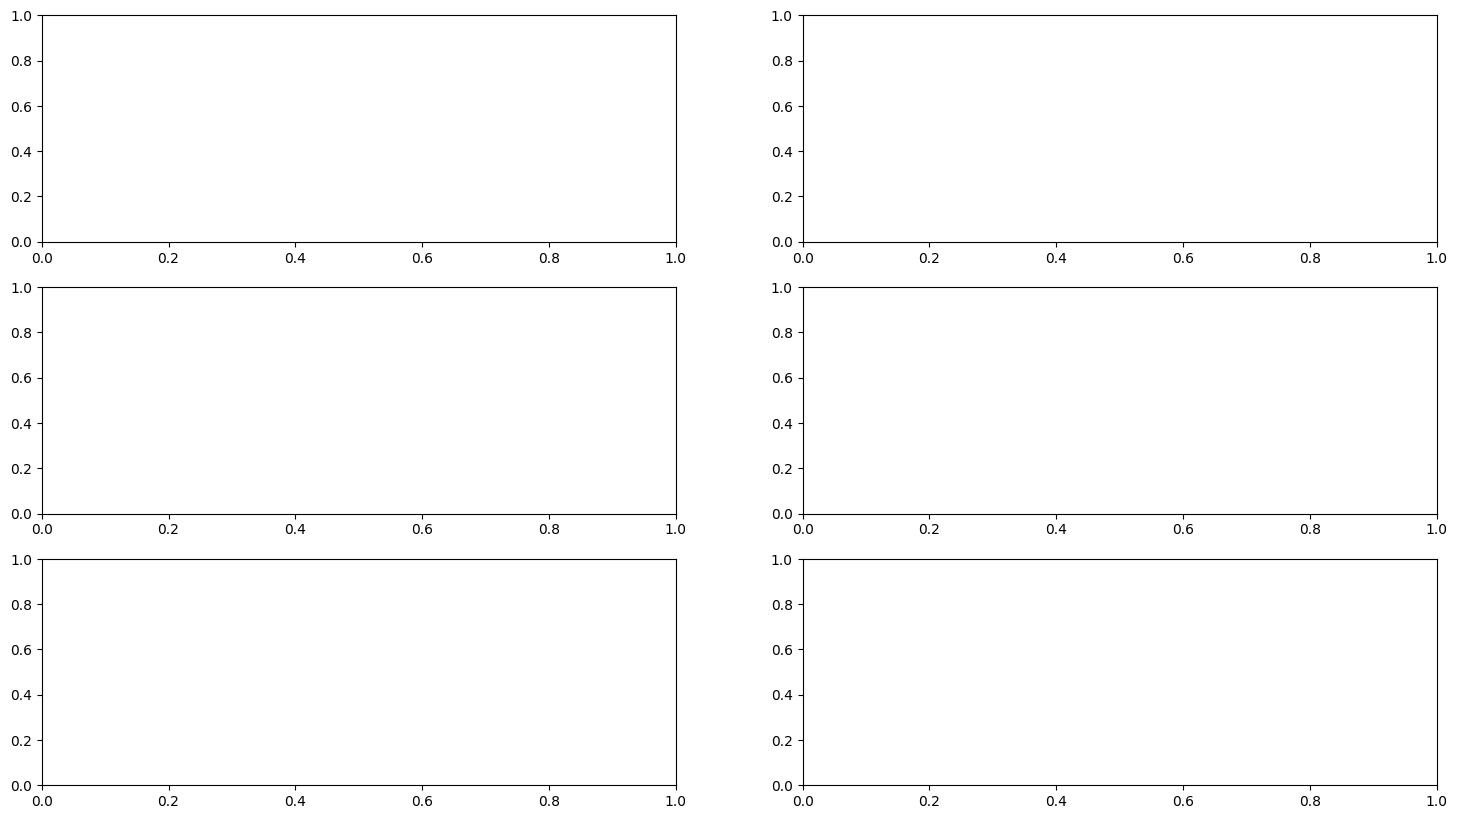

In [17]:
#Check for outliers
from matplotlib import pyplot as plt
fig, axes = plt.subplots(3,2, figsize=(18, 10))
  
sns.boxplot(ax=axes[0, 0], data=df, x='classes', y='age')
sns.boxplot(ax=axes[0, 1], data=df, x='classes', y='TSH')
sns.boxplot(ax=axes[1, 0], data=df, x='classes', y='T3')
sns.boxplot(ax=axes[1, 1], data=df, x='classes', y='TT4')
sns.boxplot(ax=axes[2, 0], data=df, x='classes', y='T4U')
sns.boxplot(ax=axes[2, 1], data=df, x='classes', y='FTI')

### There are outliers in dataset so will use median to fill null values in numerical and mode for categorical data

In [18]:
from sklearn.impute import SimpleImputer

#Handle numerical features
simple_imputer=SimpleImputer(strategy='median')
numerical_missing=pd.DataFrame(simple_imputer.fit_transform(df.select_dtypes(exclude='O')))

#Handle categorical features
cat_imputation=SimpleImputer(strategy='most_frequent')
categorical_missing=pd.DataFrame(cat_imputation.fit_transform(df.select_dtypes(exclude='number')))

numerical_missing.columns=df.select_dtypes(exclude='O').columns
categorical_missing.columns=df.select_dtypes(exclude='number').columns

data=pd.concat([numerical_missing,categorical_missing],axis=1)

In [19]:
data.head()

,ID,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG,referral_source,Target
0,3733.0,41,F,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,?,SVHC,negative
1,1442.0,23,F,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,?,other,negative
2,2965.0,46,M,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,?,other,negative
3,806.0,70,F,t,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,?,other,negative
4,2807.0,70,F,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,?,SVI,negative


In [ ]:
data.isnull().sum()

ID                           0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
referral_source              0
Target                       0
dtype: int64

## Outliers detection and removal

Since all the numerical features not following Normal distribution, will use percentile method to detect the outliers and remove them

In [20]:
data[data.age>100]

TypeError: ignored

In [ ]:
data=data.drop(data.age.index[1364])

In [ ]:
def outliers_removal(numerical_missing):
    for column in numerical_missing:
        sort=np.sort(numerical_missing[column])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detected_outliers=numerical_missing.iloc[np.where((numerical_missing[column]>upper_limit) | (numerical_missing[column]<lower_limit))]
        return detected_outliers


In [ ]:
outliers_data=outliers_removal(data)
outliers_data

,ID,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Target
0,3733.0,41,F,f,f,f,f,f,f,f,...,t,2.5,t,125,t,1.14,t,109,SVHC,negative
26,3724.0,60,M,t,f,f,f,f,f,f,...,t,1.4,t,57,t,0.62,t,92,other,negative
35,3659.0,25,F,f,f,f,f,f,f,f,...,f,?,t,101,t,1.07,t,94,other,negative
81,3703.0,72,F,f,t,f,f,f,f,f,...,f,?,t,114,t,1.11,t,102,other,negative
86,3656.0,31,F,f,f,f,f,f,f,f,...,f,?,t,161,t,1.33,t,121,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,3702.0,55,M,f,f,f,f,f,f,f,...,t,2.1,f,?,f,?,f,?,other,negative
2781,3681.0,72,F,f,f,f,f,f,f,f,...,f,?,t,87,t,0.93,t,93,other,negative
2791,3622.0,68,F,f,f,f,f,f,f,f,...,f,?,t,103,t,1.01,t,102,SVI,negative
2795,3689.0,70,M,f,f,f,f,f,f,f,...,f,?,t,155,t,1.05,t,148,SVI,negative


In [21]:
new_df=data.drop(outliers_data.index)
new_df.head()

NameError: ignored

In [25]:

new_df.shape

NameError: ignored

In [27]:

new_df.columns

NameError: ignored

In [28]:
new_df.to_csv('Preprocessed_data.csv',index=False)

NameError: ignored

In [29]:
X = new_df.iloc[: , 0:-1]
Y = new_df.iloc[: , -1] 

NameError: ignored

## Splitting the dataset into the Training set and Test set

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

NameError: ignored

## Encoding categorical data

### Encoding the Independent Variable

In [ ]:
ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_train.select_dtypes(exclude='number')))
X_train_cat_encoded.columns = X_train.select_dtypes(exclude='number').columns

In [31]:
X_test_cat_encoded = pd.DataFrame(ordinal_encoder.transform(X_test.select_dtypes(exclude='number')))
X_test_cat_encoded.columns = X_test.select_dtypes(exclude='number').columns

NameError: ignored

### Encoding the Dependent Variable

In [32]:
label_encoder = LabelEncoder()
Y_train_cat_encoded= pd.DataFrame(label_encoder.fit_transform(Y_train))
print(Y_train_cat_encoded.value_counts())
print(Y_train.value_counts())

NameError: ignored

In [33]:
Y_test_cat_encoded = pd.DataFrame(label_encoder.transform(Y_test))

NameError: ignored

## Standardization

In [34]:
sc = StandardScaler()

X_train_sc=pd.DataFrame(sc.fit_transform(X_train.select_dtypes(exclude='O')))
X_test_sc=pd.DataFrame(sc.transform(X_test.select_dtypes(exclude='O')))

X_train_sc.columns=X_train.select_dtypes(exclude='O').columns
X_test_sc.columns=X_test.select_dtypes(exclude='O').columns


NameError: ignored

In [35]:
X_train_final=pd.concat([X_train_sc,X_train_cat_encoded],axis=1)

X_test_final=pd.concat([X_test_sc,X_test_cat_encoded],axis=1)

NameError: ignored

## Handle imbalanced data

In [36]:
data['tumor'].value_counts()

f    2729
t      71
Name: tumor, dtype: int64

#### Since the dataset is small, will use over-sampling: SMOTE technique to balance the data

SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbours for this point. The synthetic points are added between the chosen point and its neighbours.

In [37]:
X_train_resample,Y_train_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_train_final,Y_train_cat_encoded)
X_test_resample,Y_test_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_test_final,Y_test_cat_encoded)

X_train_resample.shape,X_test_resample.shape,Y_train_resample.shape,Y_test_resample.shape

NameError: ignored

## Feature Selection

In [43]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.externals import joblib 

ModuleNotFoundError: ignored

In [44]:
print('Training dataset shape:', X_train_resample.shape, Y_train_resample.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample.shape)

Y_train_resample_flat = Y_train_resample.to_numpy().ravel()
Y_test_resample_flat = Y_test_resample.to_numpy().ravel()

print('Training dataset shape:', X_train_resample.shape, Y_train_resample_flat.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample_flat.shape)


NameError: ignored

In [45]:
from sklearn.ensemble import RandomForestClassifier as rfc
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.externals import joblib 

rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

forward_fs = sfs(rfc , k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

forward_fs = forward_fs.fit(X_train_resample, Y_train_resample_flat)

ImportError: ignored

In [46]:
feat_names = list(forward_fs.k_feature_names_)
print(feat_names)

X_train_new=X_train_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured', 'referral_source']]
X_test_new=X_test_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured', 'referral_source']]


NameError: ignored

In [47]:
rfc_model=rfc.fit(X_train_new,Y_train_resample_flat)

NameError: ignored

In [48]:
def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

In [51]:
print_Score(rfc_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)

NameError: ignored

In [52]:
print_Score(rfc_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

NameError: ignored

In [55]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,max_iter=10)

lr_model=lr.fit(X_train_new,Y_train_resample_flat)

lr_train_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
lr_test_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

NameError: ignored

In [57]:
## Navie Bayes Classification
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb_model=gnb.fit(X_train_new,Y_train_resample_flat)

gnb_train_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
gnb_test_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

NameError: ignored

In [59]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=5)
dt_model=dtc.fit(X_train_new,Y_train_resample_flat)

dt_train_score=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
dt_test_model=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

NameError: ignored

In [60]:
## KNN

knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_new,Y_train_resample_flat)

knn_train_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
knn_test_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

NameError: ignored

## EDA
Using Pandas Profiling for EDA

In [61]:
profile=ProfileReport(data,title="Thyroid Disease Detection",explorative=True)

NameError: ignored

### Save EDA report to html file

In [62]:
profile.to_file("EDA Report.html")

NameError: ignored

In [63]:
profile.to_notebook_iframe()

NameError: ignored